# Ice. Determination of video game success

## Contenido <a id='back'></a>

* [Introducción](#intro)  
* [1. Exploración de los datos](#data_review)
* [2. Preprocesamiento de datos](#data_preprocessing)
* [3. EDA](#eda)
* [4. Prueba de hipótesis](#hypotheses)
* [Conclusión general](#end)


## Introducción <a id='intro'></a>

La tienda online Ice que vende videojuegos por todo el mundo requiere identificar patrones en sus datos que determinen si un juego tiene éxito o no y lograr determinar que proyectos son prometedores y planificar campañas publicitarias.

## Objetivos

1. Preprocesar los datos para el cálculo de ventas totales.
2. Realizar un analisis de datos para responder varias preguntas comerciales.
3. Crear perfiles de usuario para cada región en la que opera la empresa.
4. Probar hipótesis con respecto a las calificaciones de los usuarios. 

[Regresar a Contenido](#back)

## 1. Exploración de datos <a id='data_review'></a>


In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import levene


In [ ]:
# Carga los archivos de datos en diferentes DataFrames
data_games= pd.read_csv('/datasets/games.csv')

In [2]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


[Regresar a Contenido](#back)

## 2. Preprocesamiento de datos <a id='data_preprocessing'></a>

Para comenzar, se observa que hay algunos datos que requieren corregirloa, como el nombre de las columnas, se observan datos ausentes, combertirles al tipo necesario.

In [4]:
# Reemplaza los nombres de las columnas
data_games=data_games.rename(
    columns={
        'Name':'name',
        'Platform':'platform',
        'Year_of_Release': 'year_of_release', 
        'Genre':'genre', 'NA_sales':'na_sales', 
        'EU_sales':'eu_sales', 
        'JP_sales':'jp_sales', 
        'Other_sales':'other_sales', 
        'Critic_Score':'critic_score', 
        'User_Score':'user_score', 
        'Rating':'rating'
    }
)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data_games['user_score'].value_counts().head() ,data_games['user_score'].value_counts().tail()

(tbd    2424
 7.8     324
 8       290
 8.2     282
 8.3     254
 Name: user_score, dtype: int64,
 9.6    2
 1.9    2
 0.6    2
 0      1
 9.7    1
 Name: user_score, dtype: int64)

In [7]:
data_games['user_score'].isna().sum()

6701

In [8]:
#Convertir los datos en los tipos necesarios

data_games['user_score']=data_games['user_score'].replace('tbd', float('nan'))
data_games['user_score']=data_games['user_score'].astype({'user_score':'float64'})
data_games.info()
data_games['user_score'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


9125

En esta ocasión en la columna 'user_score', podemos observar que tenemos una categorización denominada tbd (a determinar), la cual como su mismo nombre lo indica aun no tiene una puntuación asignada o reportada, por lo que matemáticamente no tenemos un número y lo podríamos representar como valor ausente, para poder cambiar el tipo de datos de la columna a números flotantes. Una vez que reemplazamos los valores tbd y lo cambiamos a datos flotantes, podemos observar que el numero de datos ausentes son la suma los ausentes que ya estaban en el df sumados con los que eran tbd.

In [9]:
# Revisar los datos ausentes

data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

En este caso podemos apreciar que en varias columnas existen varios datos ausentes, sin embargo, cada una de las filas representa un juego, por lo q ue cada fila es única, por ejemplo, en el caso de la columna 'year_of_release' que es el año de lanzamiento, no se puede poner un año, debido a que la varianza serpia muy alta y al rellenar los datos con la media o media, según sea el caso más conveniente, pero esto podría dar un dato completamente falso y afectar el análisis que se pretende hacer; de igual maenra podemos indicar que en las columnas de puntuación 'critic_score' y 'user_score', no se le puede asignar o rellenar estas calificaciones o evaluaciones como la media o mediana, ya que esta puntuación podría ser falsa y no obtendríamos un análisis fiable o veraz, motivo por el que se considera que se conservarán los datos ausentes.


In [10]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego
data_games['total_sales']=data_games['na_sales']+data_games['eu_sales']+data_games['jp_sales']+data_games['other_sales']
data_games.info()
data_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


[Regresar a Contenido](#back)

# 3. EDA <a id='eda'></a>



In [11]:
# Cuántos juegos fueron lanzados en diferentes años

data_games['year_of_release'].value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

En este caso podemos observar que a mediados de la década de los 90's, comenzó un incremento considerable de videojuegos, viendo un máximo en el periodo de la década de los 2000, donde podemos obserbar mayor cantidad de la población de los juegos en esta década.

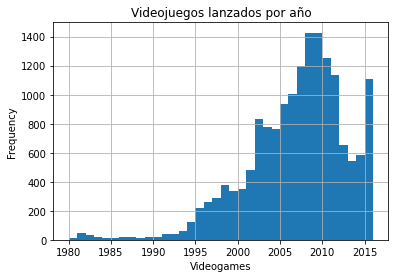

In [12]:
data_games['year_of_release'].hist(bins=36)
plt.title('Videojuegos lanzados por año')
plt.xlabel('Videogames')
plt.ylabel('Frequency')
plt.show()

Se puede apreciar que la mayoría de los videojuegos se lanzaron a paratir del 2000

In [13]:
# Cómo varían las ventas de una plataforma a otra

data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [14]:
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.
best_sales=data_games.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii"')
best_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16689,Real Rode,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [15]:
best_sales.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum')

platform,PS2,PS3,Wii,X360
year_of_release,,,,
2000.0,39.17,NaN,NaN,NaN
2001.0,166.43,NaN,NaN,NaN
2002.0,205.38,NaN,NaN,NaN
2003.0,184.31,NaN,NaN,NaN
2004.0,211.81,NaN,NaN,NaN
2005.0,160.66,NaN,NaN,8.25
2006.0,103.42,20.96,137.15,51.62
2007.0,75.99,73.19,152.77,95.41
2008.0,53.90,118.52,171.32,135.26


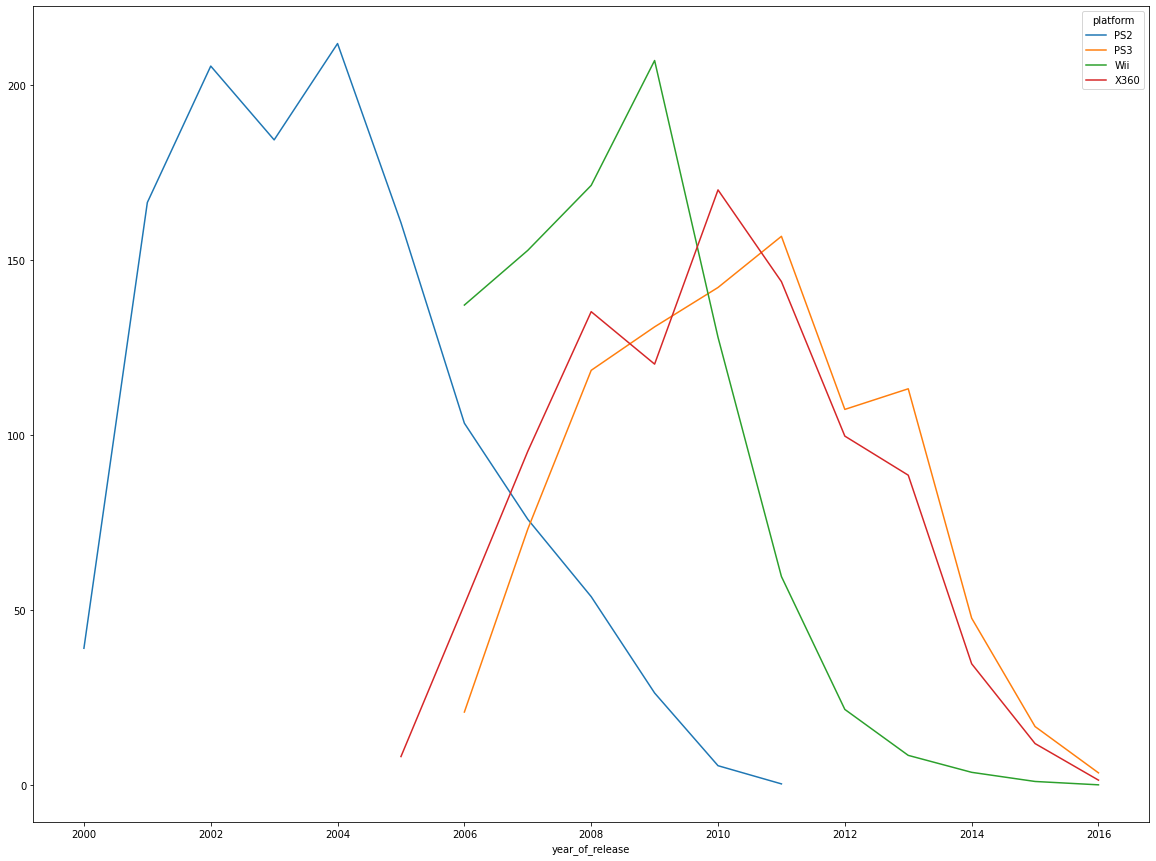

In [16]:
best_sales.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum').plot(figsize=(20,15))
plt.show()

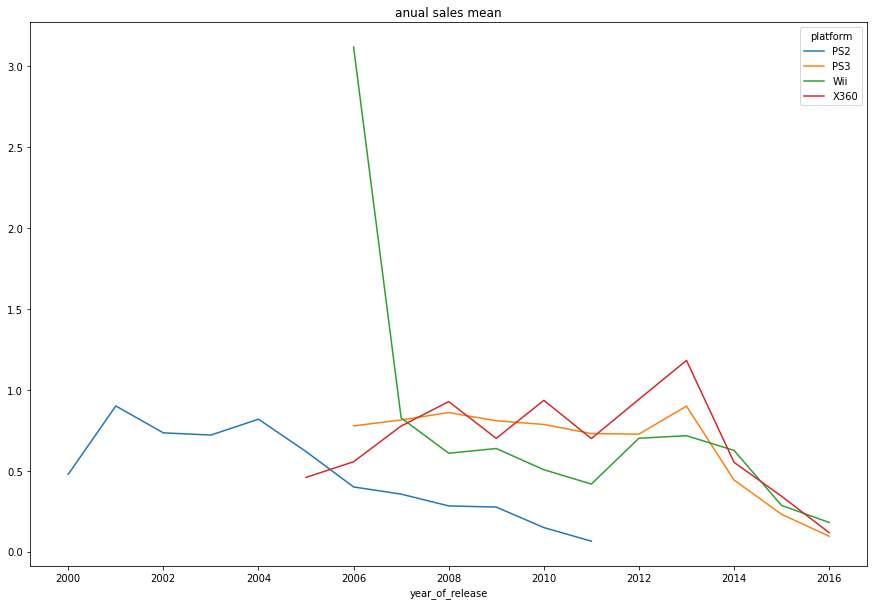

In [17]:
best_sales_anual=best_sales.pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='mean')
best_sales_anual.plot(figsize=(15,10), title='anual sales mean')
plt.show()

Podemos observar que analizando las plataformas con más ventas, se aprecia que la plataforma Wii, fue la que tuvo un promedio de ventas mayor en el año 2006, pero quien se mantuvo más contante en altas ventas a lo largo de los años fue la X360.

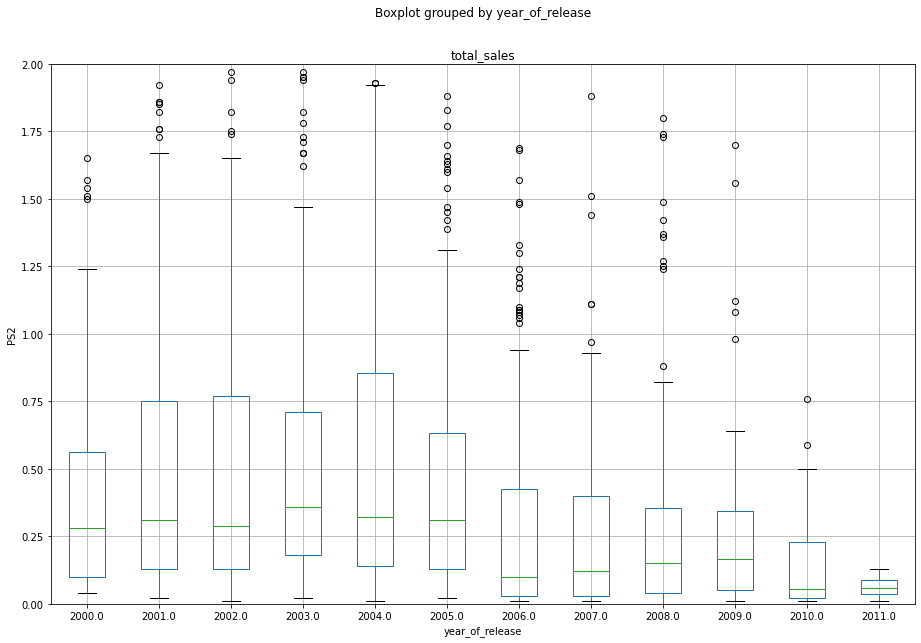

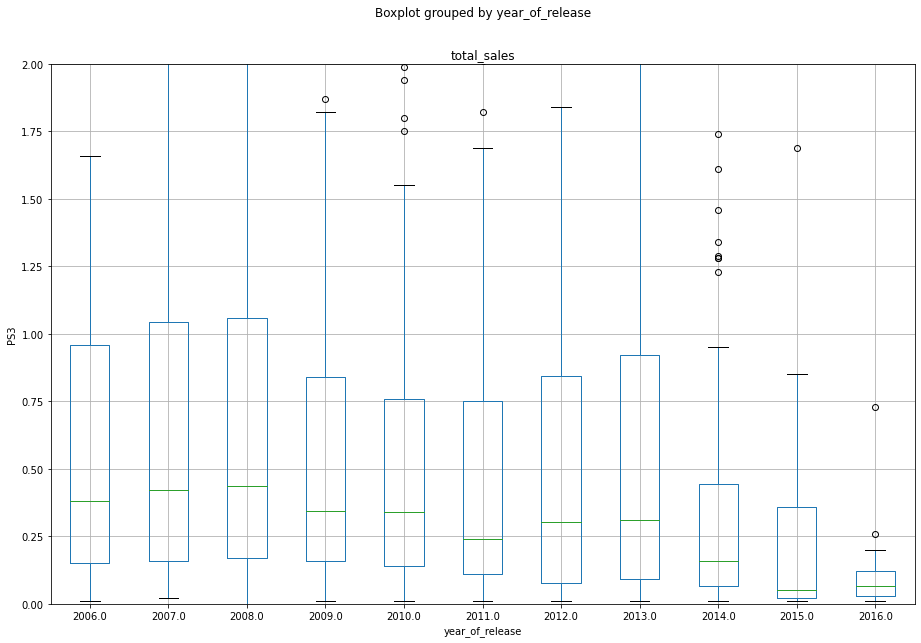

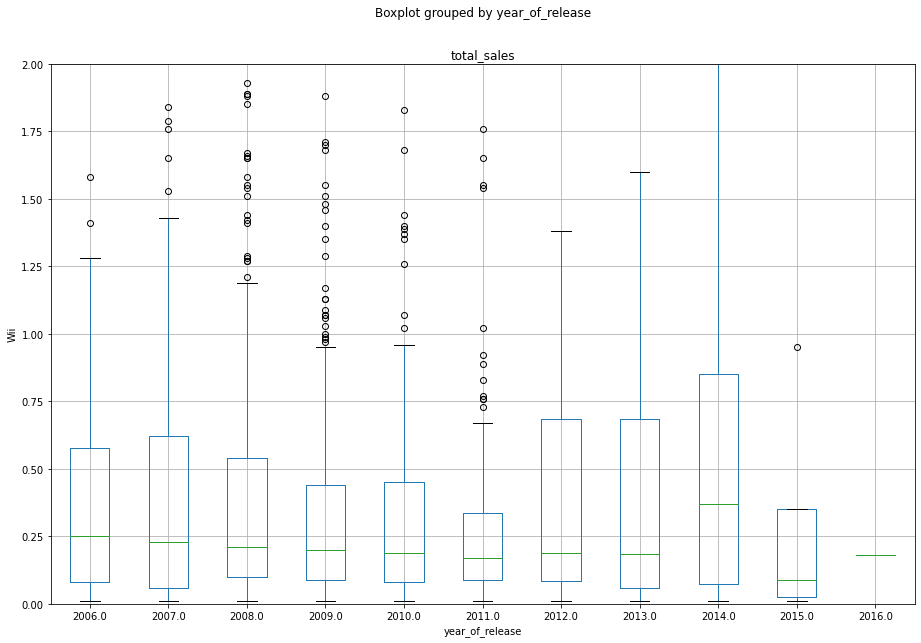

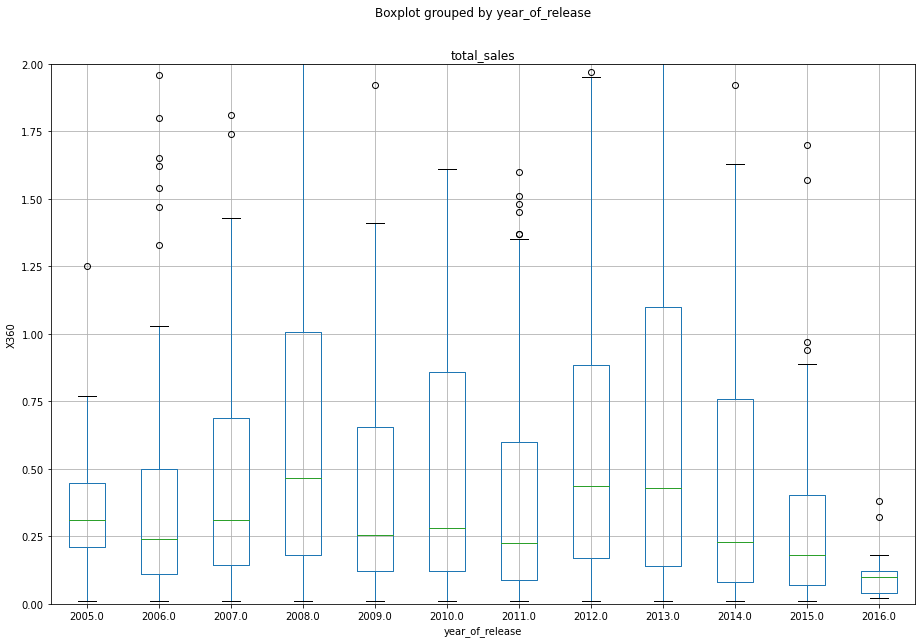

In [18]:
for plataform, gamedata in best_sales.groupby('platform'):
    gamedata.boxplot(column='total_sales', by='year_of_release', figsize=(15,10))
    plt.ylim(0, 2)
    plt.ylabel(plataform)

In [19]:
data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [20]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

died_games=data_games.query('platform=="PS2" or platform=="DS" or platform=="PS" or platform=="GBA"')
died_games.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum')


platform,DS,GBA,PS,PS2
year_of_release,,,,
1985.0,0.02,NaN,NaN,NaN
1994.0,NaN,NaN,6.03,NaN
1995.0,NaN,NaN,35.96,NaN
1996.0,NaN,NaN,94.70,NaN
1997.0,NaN,NaN,136.17,NaN
1998.0,NaN,NaN,169.49,NaN
1999.0,NaN,NaN,144.53,NaN
2000.0,NaN,0.07,96.37,39.17
2001.0,NaN,61.53,35.59,166.43


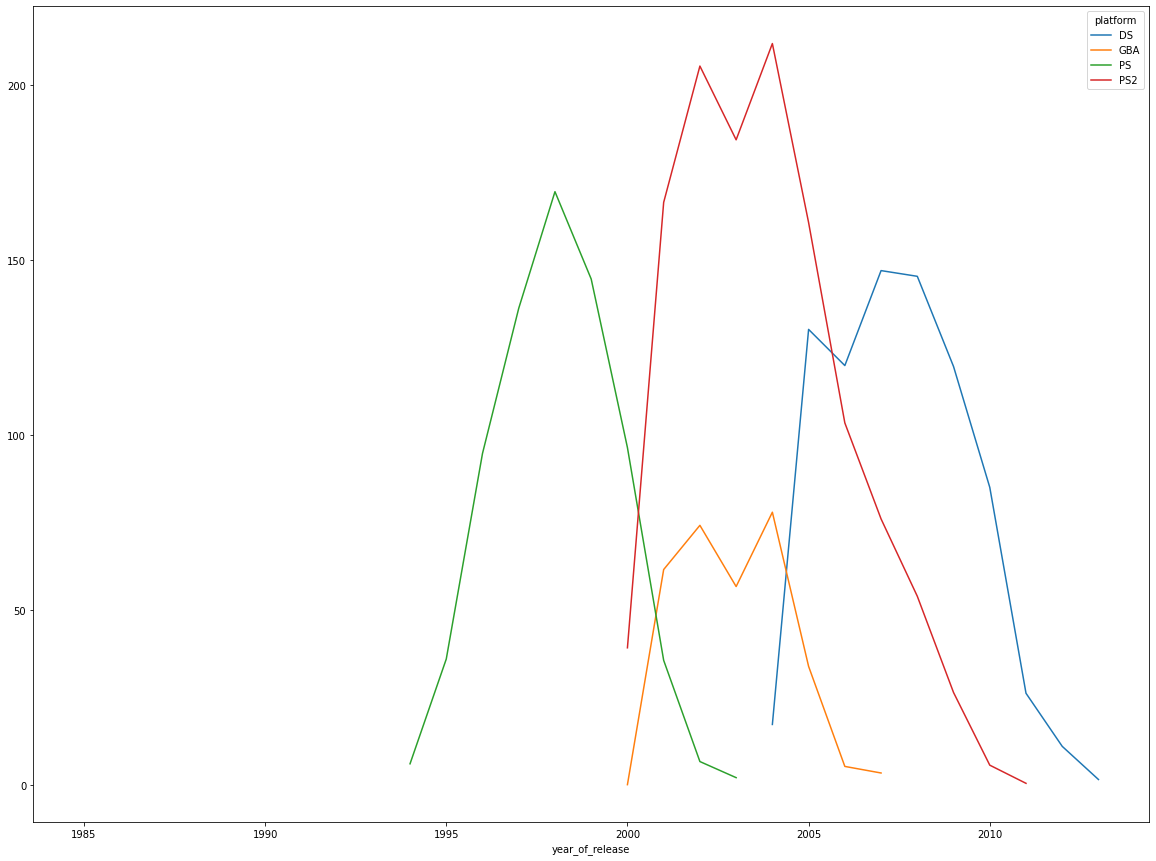

In [21]:
died_games.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum').plot(figsize=(20,15))
plt.show()


Con base en lo observado, podemos indicar que las 4 plataformas que  tienen más populares  y que ya no tienen ventas son la PS2, que ha sido la plataforma que ha recaudado más ventas; tmabién tenemos la plataforma DS, PS y GBA.

In [22]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

sales_anual_platform=data_games.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum')
sales_anual_platform

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='year_of_release'>

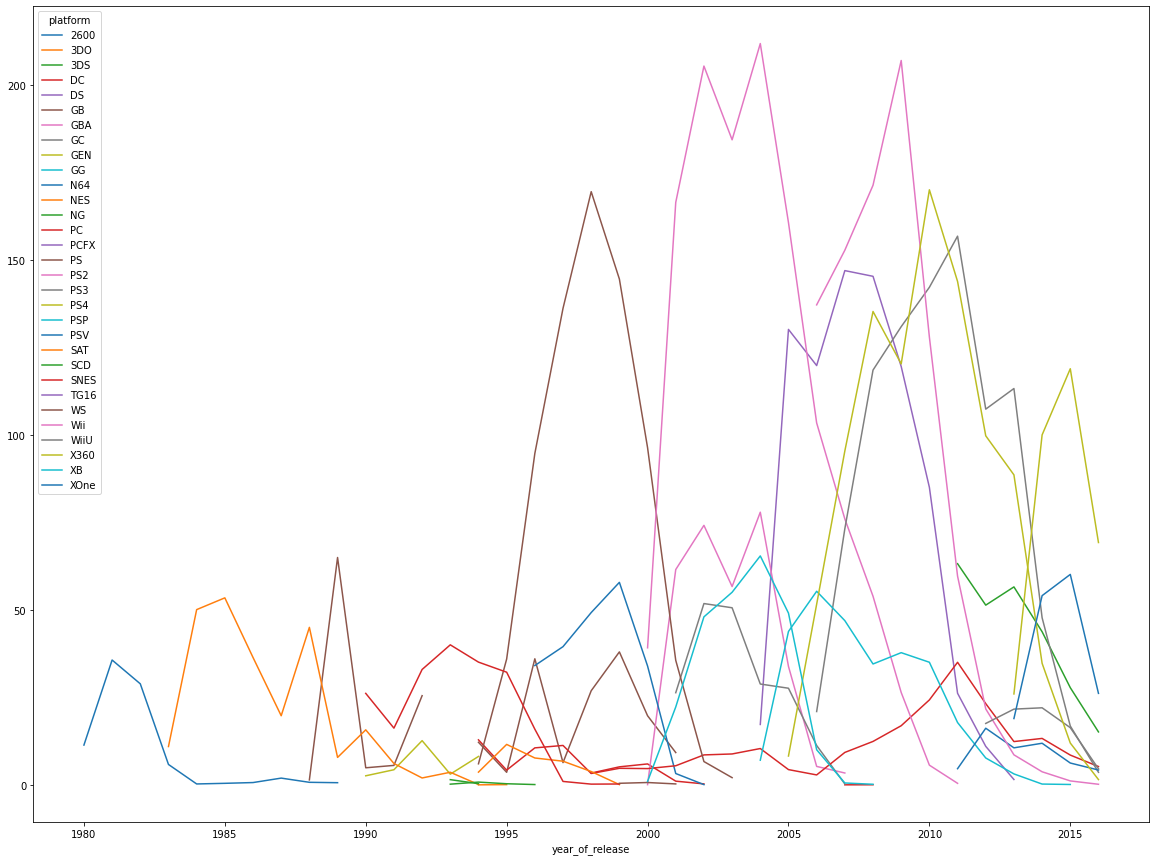

In [24]:
# Analisis de ventas totales globales por plataforma
data_games.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum').plot(figsize=(20,15))

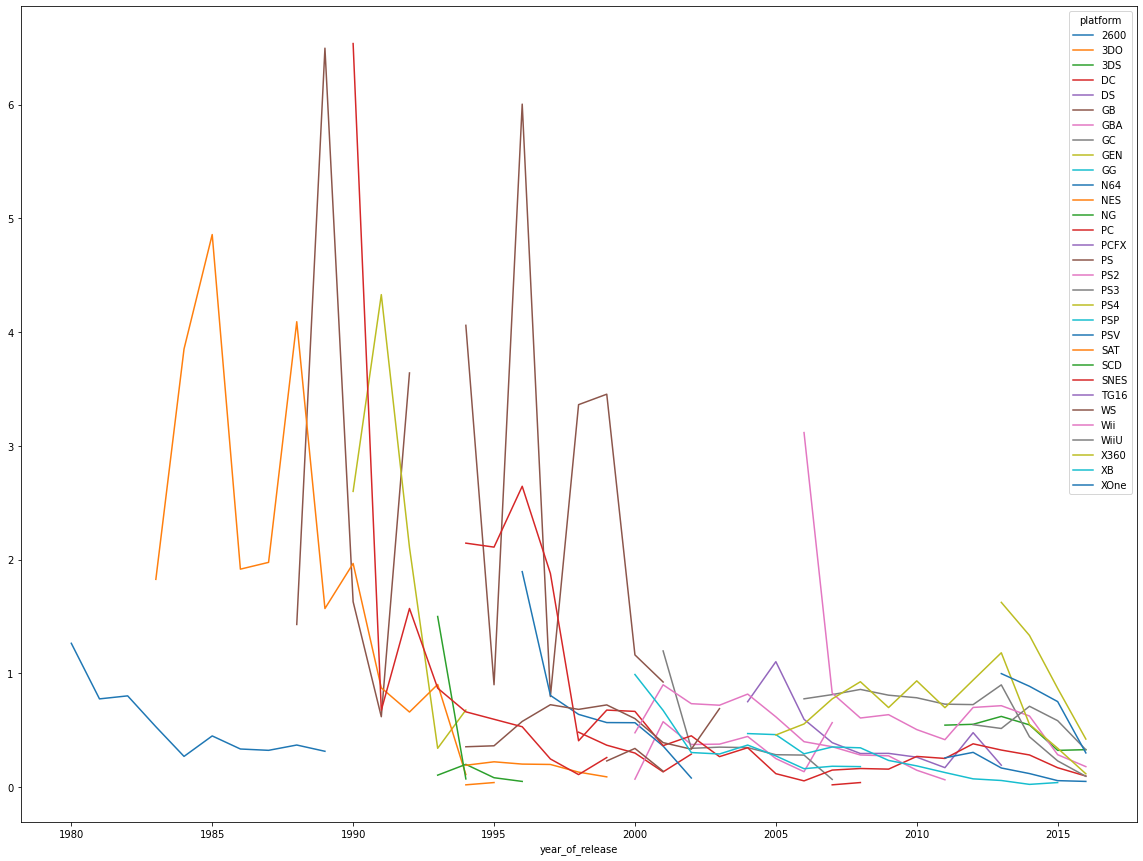

In [25]:
# Analisis de ventas promedio por plataforma
data_games.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='mean').plot(figsize=(20,15))
plt.show()

In [26]:
data_games.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS" ').pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum')

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN
2000.0,NaN,39.17,NaN,NaN,NaN
2001.0,NaN,166.43,NaN,NaN,NaN
2002.0,NaN,205.38,NaN,NaN,NaN
2003.0,NaN,184.31,NaN,NaN,NaN
2004.0,17.27,211.81,NaN,NaN,NaN
2005.0,130.14,160.66,NaN,NaN,8.25
2006.0,119.81,103.42,20.96,137.15,51.62
2007.0,146.94,75.99,73.19,152.77,95.41


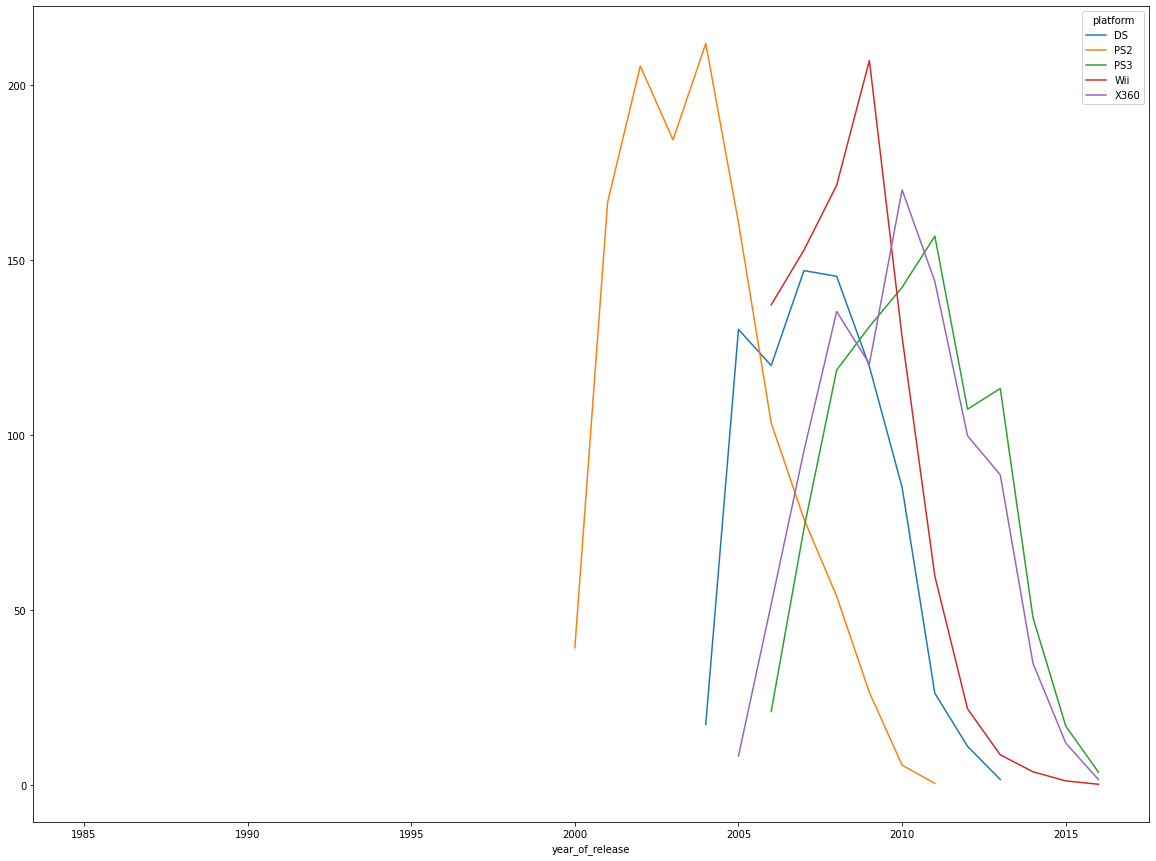

In [27]:
data_games.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS"').pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum').plot(figsize=(20,15))
plt.show()

Podemos observar como en todas las plataformas comienzan con pocos video juegos es por eso que las ventas no son altas, pero conforme se aumenta el número de videojuegos la plataforma se vuelve más popular y aumentan las ventas por plataforma, en este útlimo grafico se puede apreciar las 7 consolas más populares y de mejores ventas, en donde podemos ver que la mayoría tardan entre 2 a 3 años en alcanzar su máximo en ventas y posteriormente después del másximo estas comienzan a disminuir, llegando a tardar en desaparecer hasta 6 años como en el caso del PSP2, que ha sido la plataforma que tuvo mayor ingreso económico y dejó de tener ventas en el 2011, al igual que ene l caso de la consola DS donde se puede apreciar que después de su máximo tarda 5 años en dejar de tener ventas y desaparezca, por lo que las plataformas más populares tendrían un ciclo de vida de alrededor de 6 - 9 años .

También podemos observar que con respecto las paltaformas con mayores ventas que superan los 800 millones de dólares, comienzan a partir del 2000 aproximadamente, sin embargo, la mayor concentración de plataformas con mayores ventas esentre en 2006 y el 2016, se considera apartir de este periodo ya que la plataforma de mayores ventas fue la PS2 se observa su disminución de ventas y la desaparción de esta, al igual que podemos observar la aparción de nuevas plataformas con ventas  globales sifnificativas arriba de los 800 millones de dólares. Por lo que el periodo que se propone para el análisis sería los últimos 10 años.

In [28]:
# Determina para qué período debes tomar datos.
good_time_games=data_games.query('year_of_release >= 2006')
good_time_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [29]:
good_time_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    952.99
PS3     931.34
Wii     891.18
DS      655.35
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.42
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='year_of_release'>

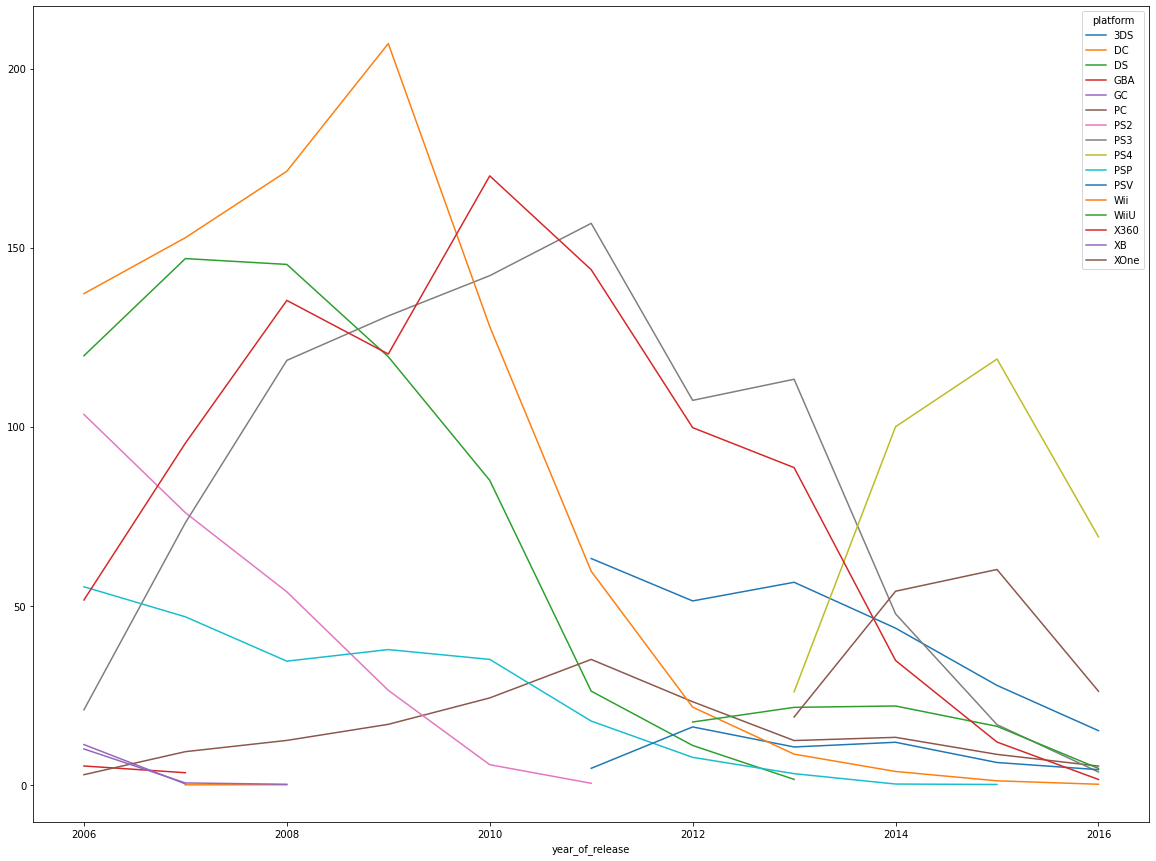

In [30]:
good_time_games.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum').plot(figsize=(20,15))

<AxesSubplot:xlabel='year_of_release'>

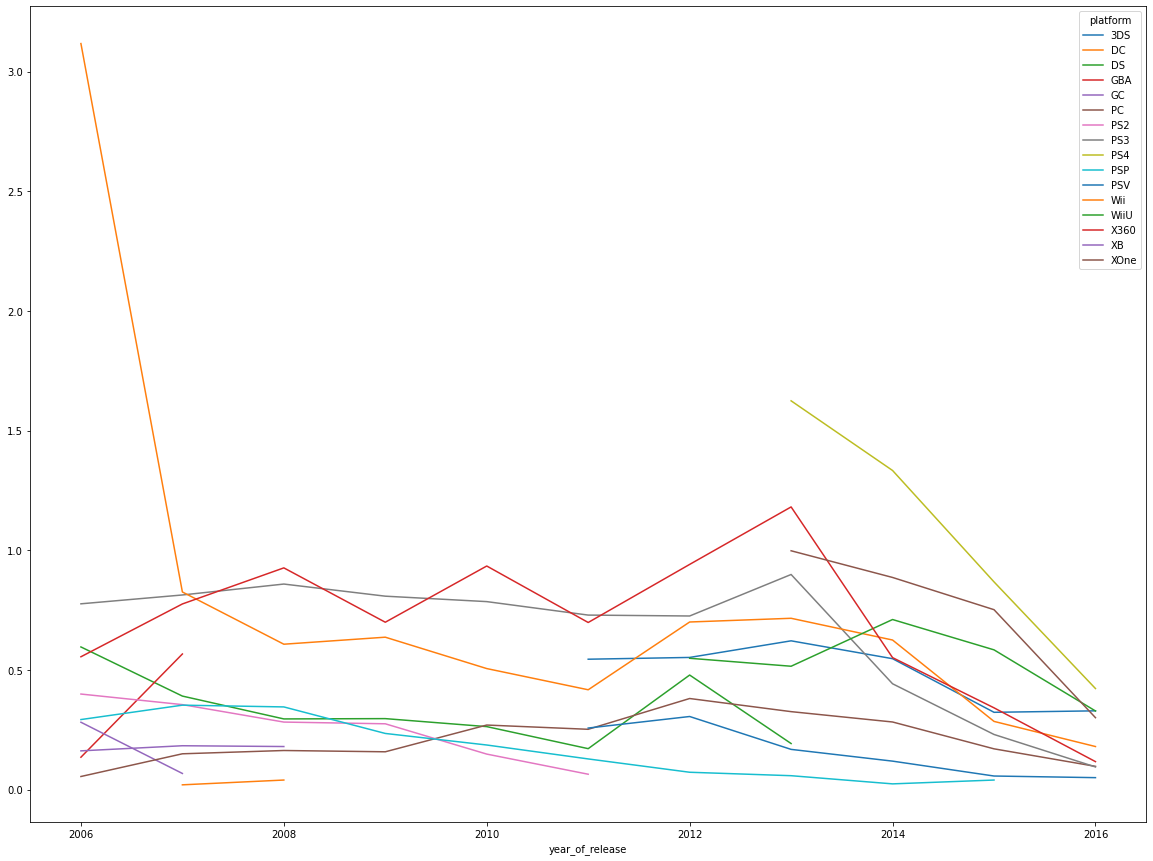

In [31]:
good_time_games.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='mean').plot(figsize=(20,15))

Como podemos observar en la grafica, en este periodo de tiempo como algunas plataformas aparecen y otras desaparecen, por ejemplo, podemos observar que en este periodo las plataformas PS2, PSP, XB y GBA, comienzan a desaparecer al disminuir sus ventas, mientras que podemos obserbar la aparición de plataformas como Wii, X360, XOne, PS4, con un crecimiento anual en sus ventas. Aunque también podemos observar que hay plataformas que tienen un crecimiento en ventas mínimo o no tienen crecimietno en ventas cuando aparecen, por ejemplo, las plataformas PSV y WiiU.

Ahora solamente tomaremos los datos más representativos en ventas, que como podemos observar son las plataformas PS2, X360, PS3, wii y DS, siendo estas las pataformas con más de 800 millones de dólares.



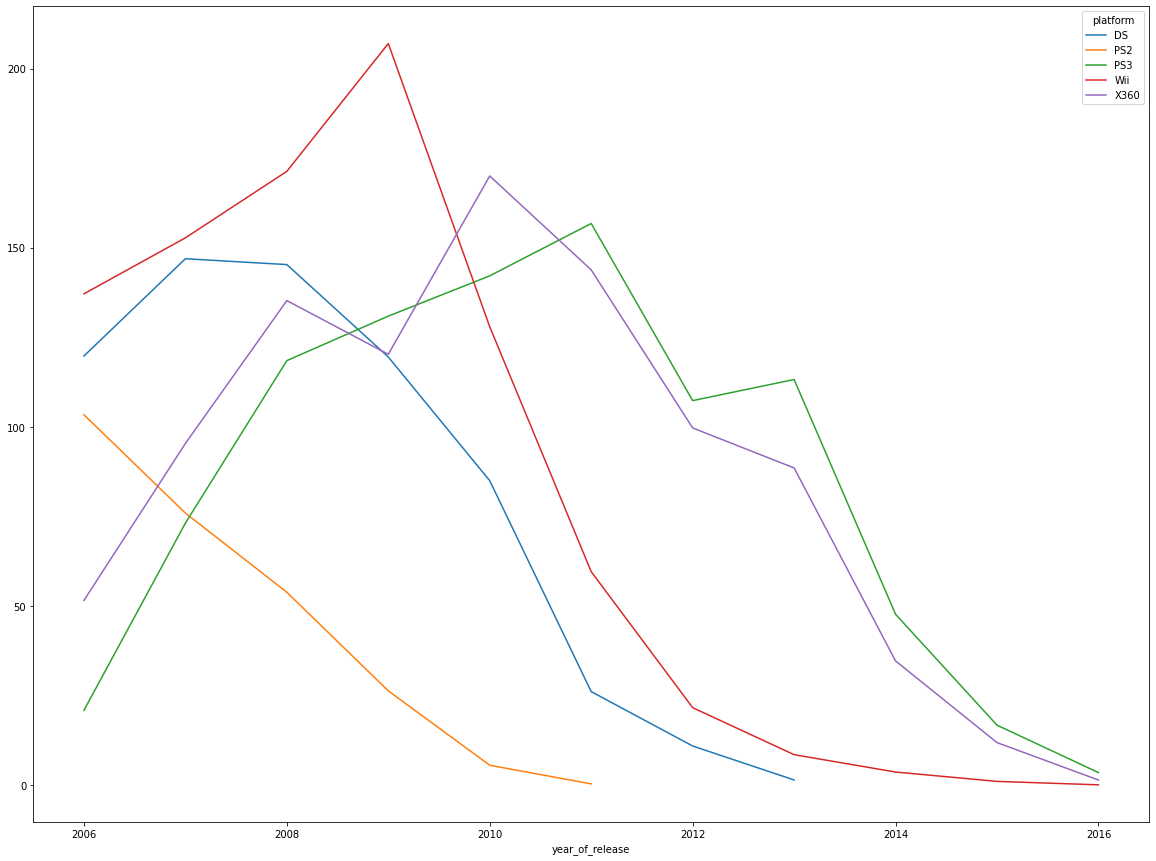

In [32]:
good_time_platform=good_time_games.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS"')
good_time_platform.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='sum').plot(figsize=(20,15))
plt.show()

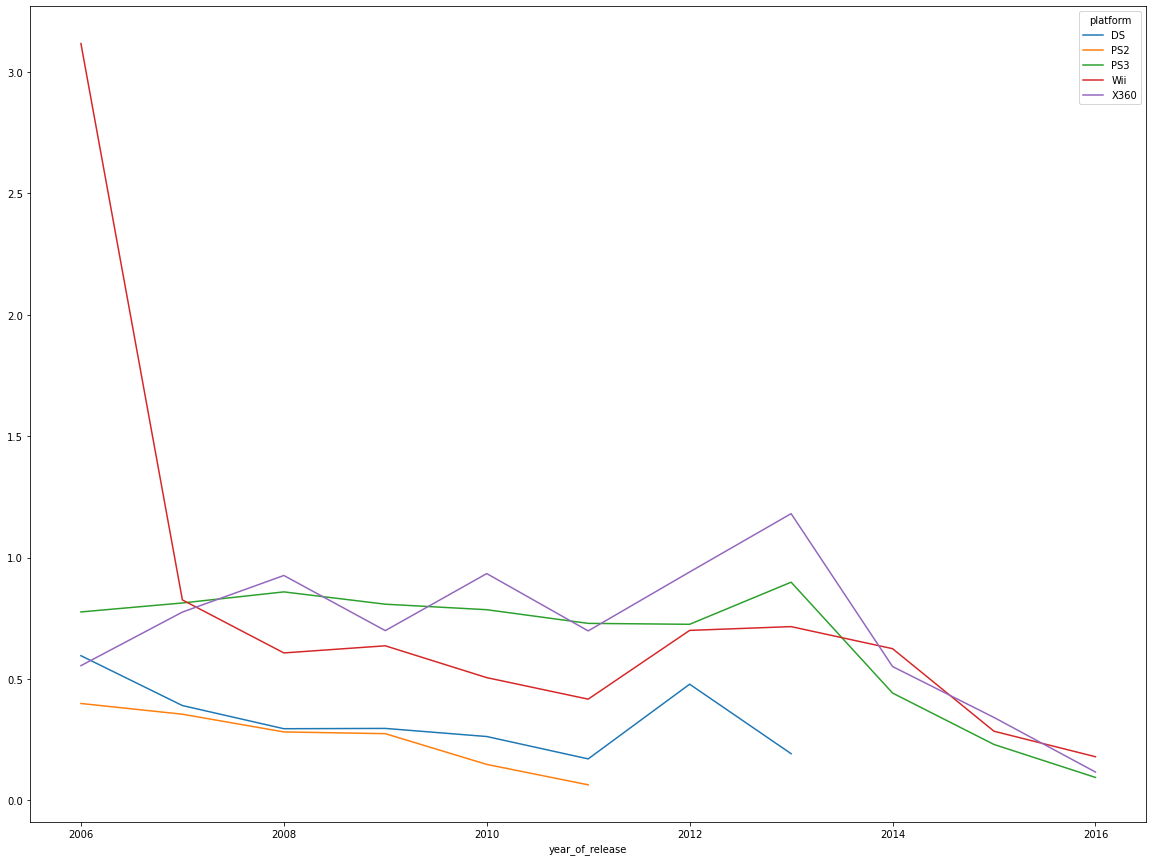

In [33]:
good_time_platform=good_time_games.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS"')
good_time_platform.pivot_table(index=['year_of_release'], columns= 'platform', values= 'total_sales', aggfunc='mean').plot(figsize=(20,15))
plt.show()

Se consideraron las 5 plataformas con mayores ventas que son la DS, PS2, PS3, Wii y X360. 

In [34]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

(0.0, 2.0)

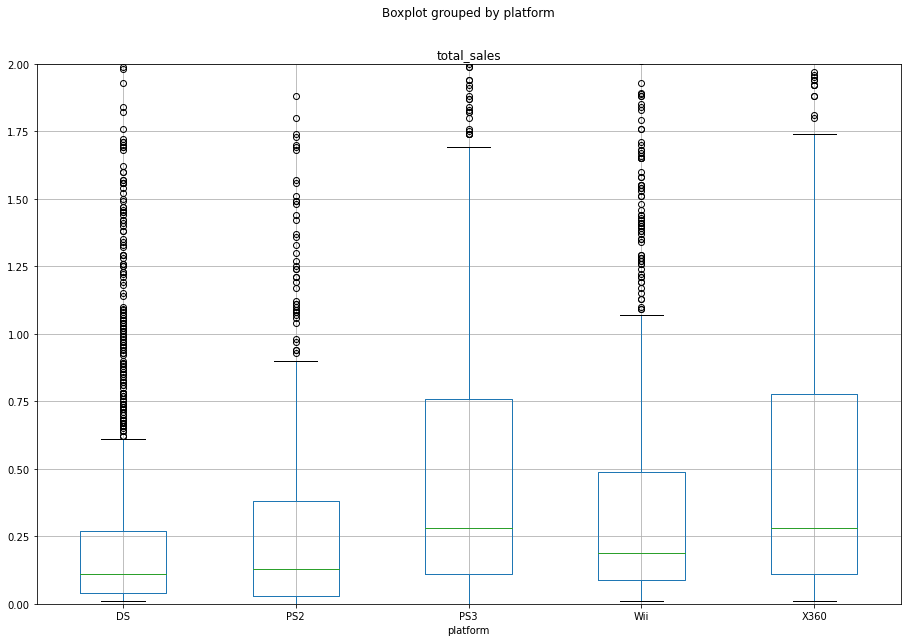

In [35]:
good_time_platform.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.ylim(0, 2)


En esta gréfica podemos observar la distribución de las ventas globales de cada una de las plataformas, donde podemos apreciar que la PS3 y X360 son las plataformas que tienen mayor distribución y son los que tiene un mayor media de ventas globales.

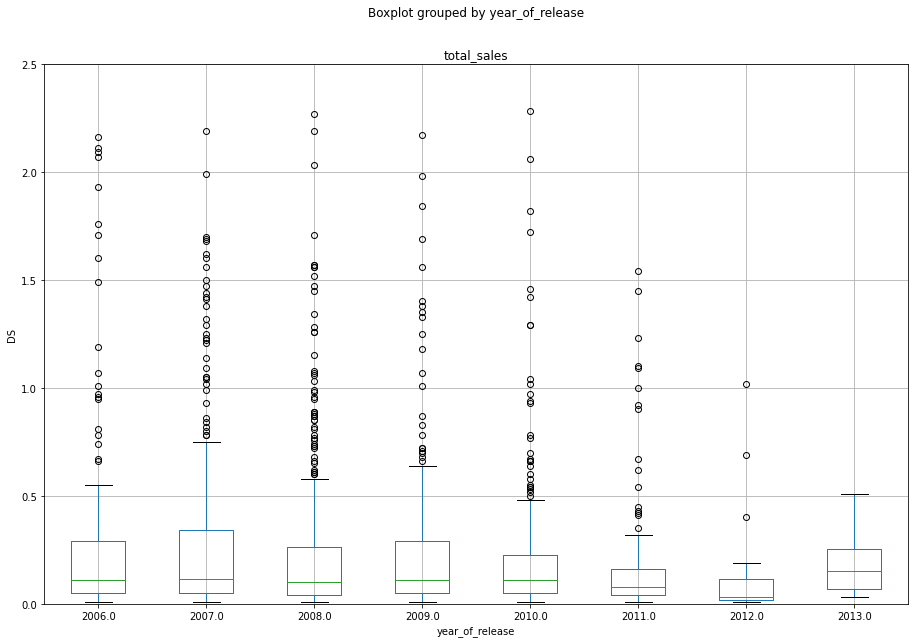

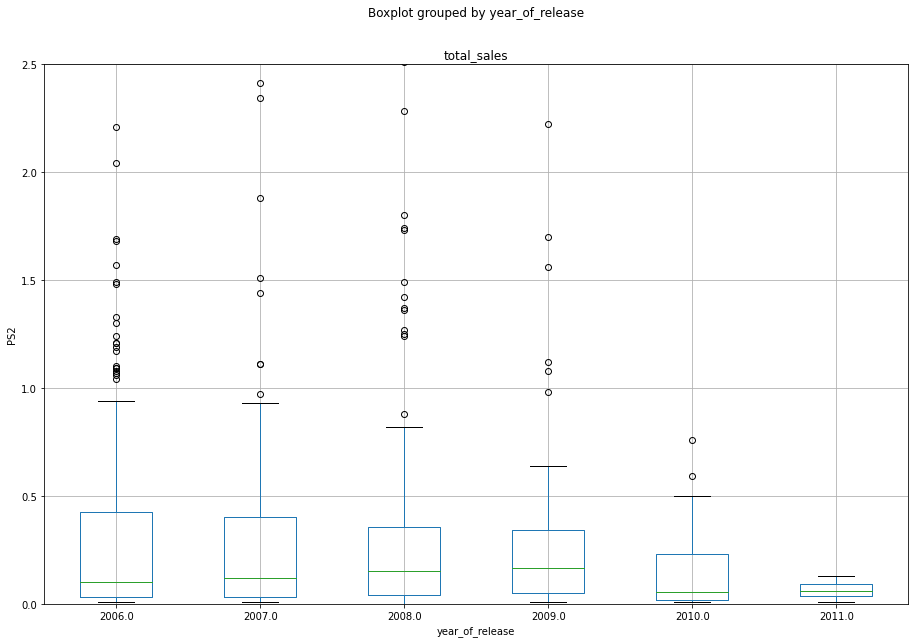

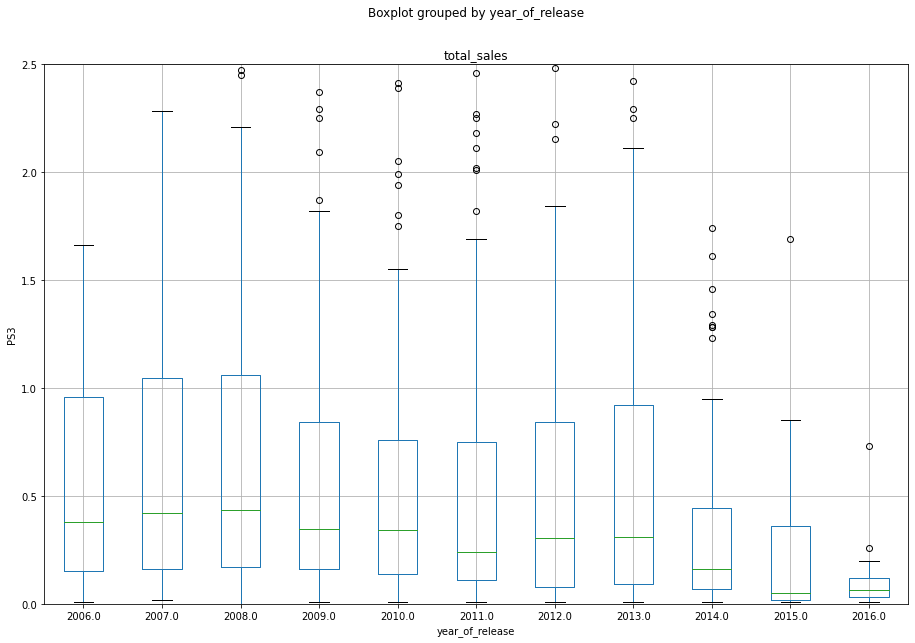

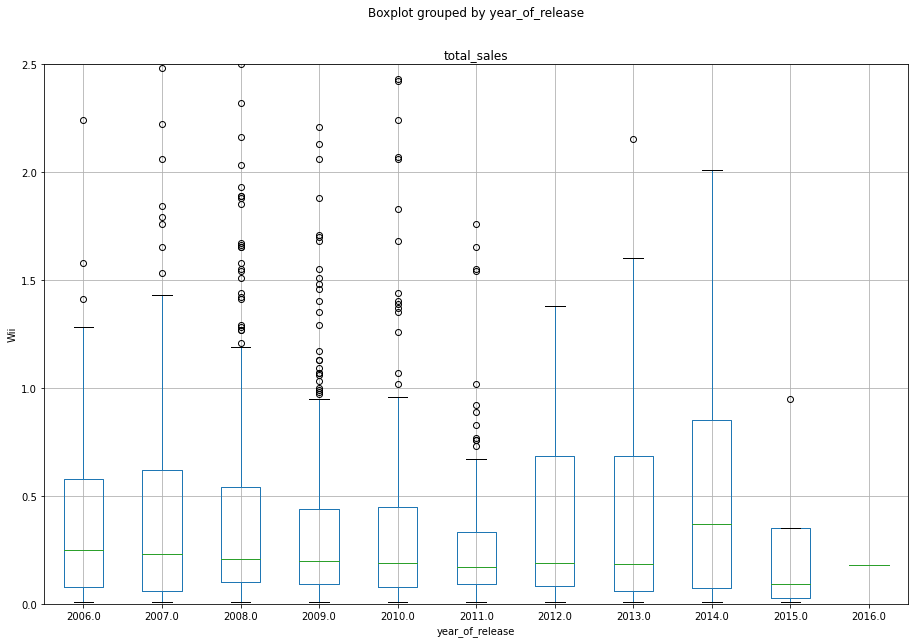

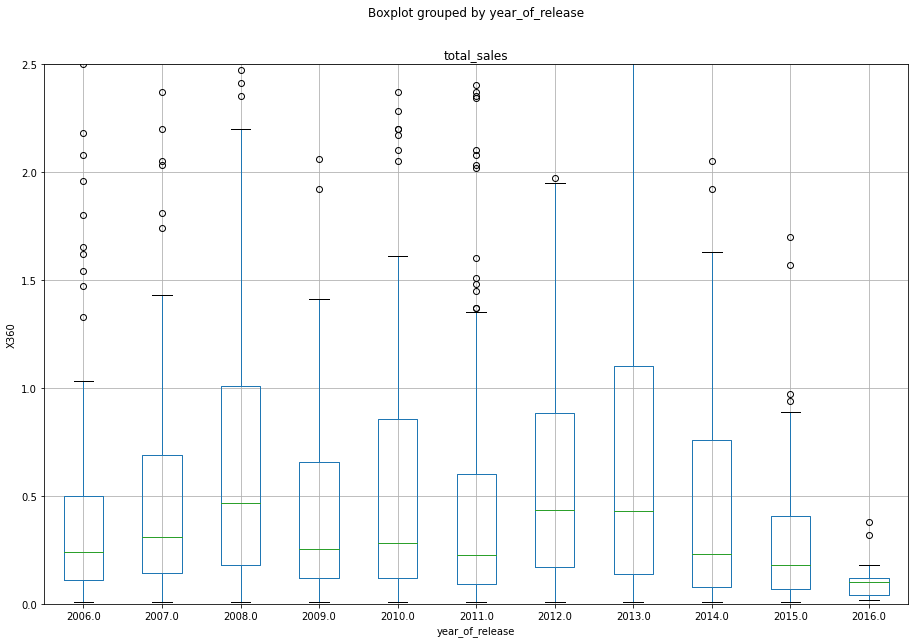

In [36]:
for plataform, gamedata in good_time_platform.groupby('platform'):
    gamedata.boxplot(column='total_sales', by='year_of_release', figsize=(15,10))
    plt.ylim(0, 2.5)
    plt.ylabel(plataform)

En estos gráficos podemos apreciar la distribución anual por plataforma de las ventas, en donde se aprecia en que años la mediana de estas disminuye y tambien cuando van disminuyendo para desapacer como es el caso de la PS2. 

La media de las ventas se puede apreciar que la gran mayoría esta por debajo de los 0.5 millones de dólares, pero todos tienen una variación pequeña.

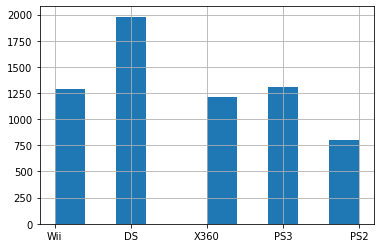

In [37]:
good_time_platform['platform'].hist()
plt.show()

En esta ocasión se presenta un histograma donde podemos observar que la plataforma que tiene mayor cantidad de  videojuegos es la DS, sin embargo, podemos apreciar en graficos anteriores que las ventas de esta platafroma no son las mejores, por lo que,podemos conlcuir conesto es que no es necesario tener muchos videojuegos para  tener buenas ventas, por loq ue este noe s un factor relevante para las ventas, ya que quienes tienen mayor cantidad de ventas y un mayor promedio de ventas anuelaes son las plataformas X360 y PS3, seguidas dela Wii.

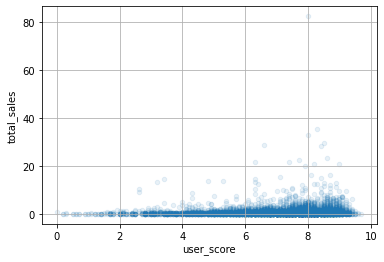

In [38]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección)
data_games.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.1, grid=True)
plt.show()

In [39]:
data_games['user_score'].corr(data_games['total_sales'])

0.08817911987579136

En una visión general, podemos apreciar que se tiene una mayor densidad de ventas cuando las calificaciones son mayores a 6 y la desnidad o número de ventas aumetna conforme mejora la calificación, siendo a simple vista la calificación 9 la que tiene una mayor concentración de ventas, debido al comportamiento de la grafica se puede determinar que la relación entre la puntuación que asigna el usuario y las ventas no son directamente proporcional, sin embargo, no tienen una dependencia fuerte. Lo cual podemos confirmar con el coeficiente de correlación es más cercano a cero, lo cual significa que hay una conexión debil.
 

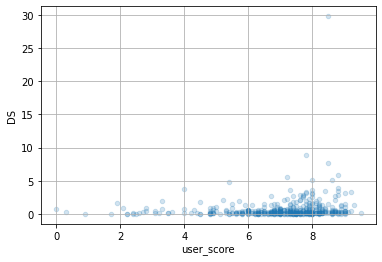

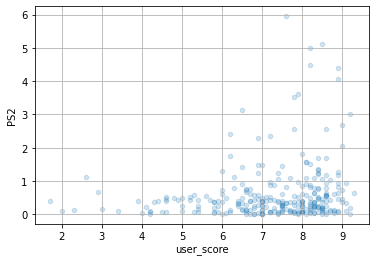

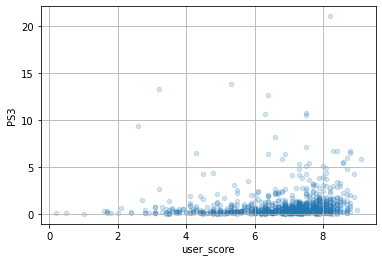

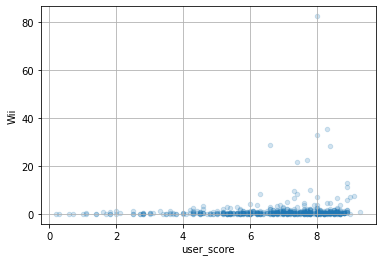

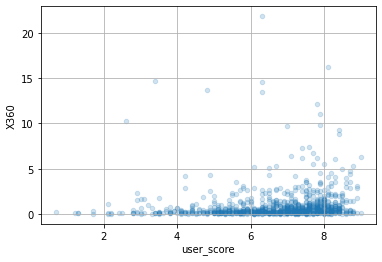

In [40]:

for plataform, gamedata in good_time_platform.groupby('platform'):
    gamedata.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, grid=True)
    plt.ylabel(plataform)

In [41]:
good_time_platform['user_score'].corr(good_time_platform['total_sales'])

0.10061517986708678

Se realizó un análisis de cada una de las plataformas, donde se puede observar nuevamente que la puntuación o calificación del usuario si afecta en las ventas, es por eso que los videojuegos que están calsificados con bajas puntuaciones tienen menos ventas que las puntuciones mayores a 6, siendo las puntuaciones de 8 los videojuegos tienen mejores ventas, sin embargo como lo mencionamos anteriormente no se tiene un a correlación fuerte o significativa entre estos dos parámetros. 

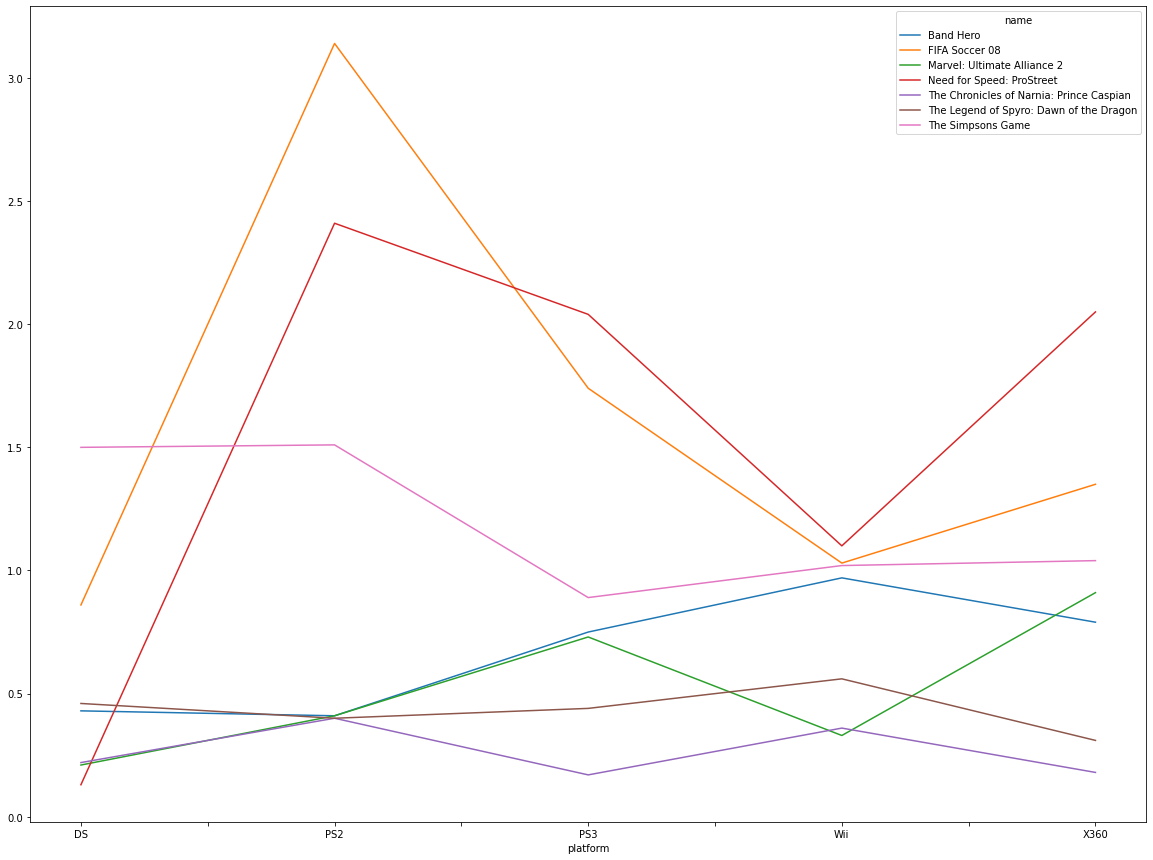

In [42]:
game_platform=good_time_platform.query('name=="The Chronicles of Narnia: Prince Caspian" or name=="The Simpsons Game" or name=="Marvel: Ultimate Alliance 2" or name=="Need for Speed: ProStreet" or name=="The Legend of Spyro: Dawn of the Dragon" or name=="FIFA Soccer 08" or name=="Band Hero"')
game_platform.pivot_table(index=['platform'], columns= 'name', values= 'total_sales', aggfunc='mean').plot(figsize=(20,15))
plt.show()


Aquí podemos observar que un mismo juego puede estar en diferentes plataformas y podemos aprecira que si hay una diferencia entre las ventas de los mismos juegos dependiendo las ventas, podemo observar por ejemplo juegos como FIFA Soccer 08, el cual podemos observar que las ventas son mejores para las plataformas PS2, PS3 y X360, siendo el mismo juego si se detecta una diferencia  en las ventas del mismo juego en diferentes plataformas.

In [43]:
data_games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

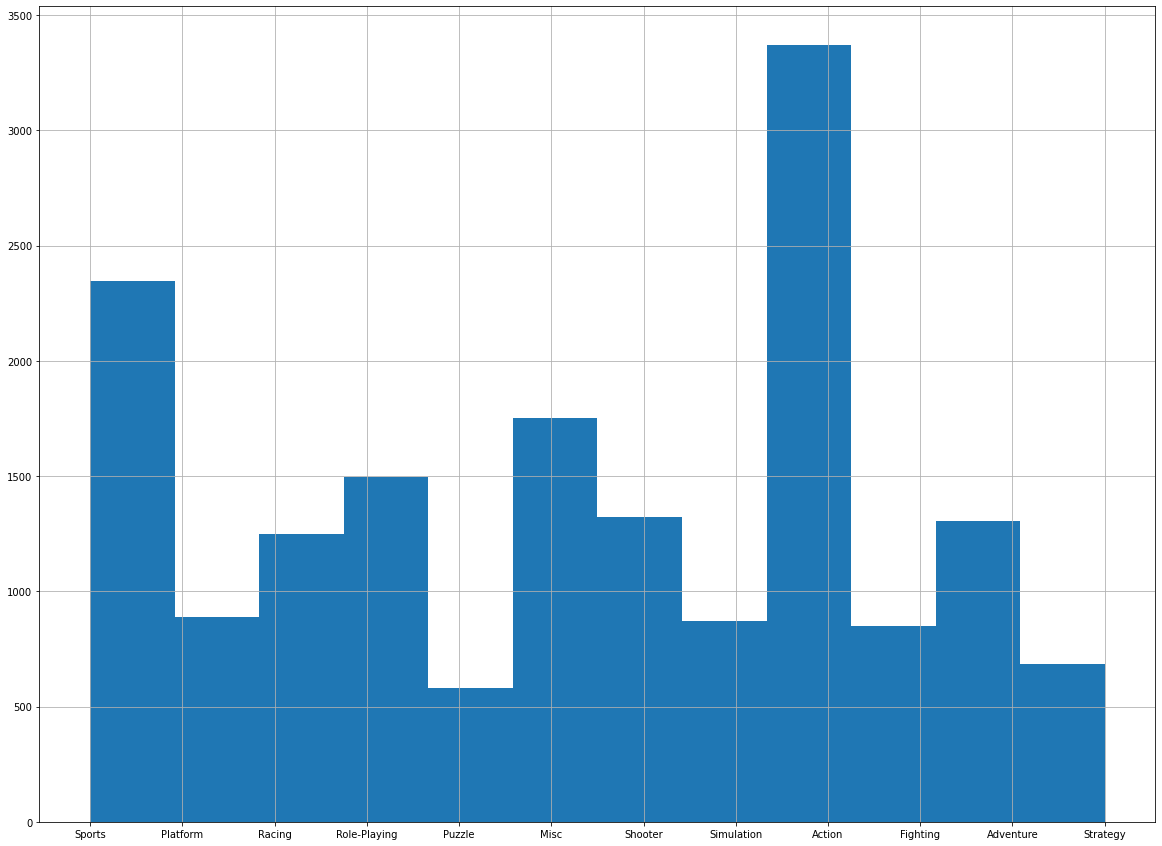

In [44]:
# Distribución general de los juegos por género 

data_games['genre'].hist(bins=12, figsize=(20,15))
plt.show()

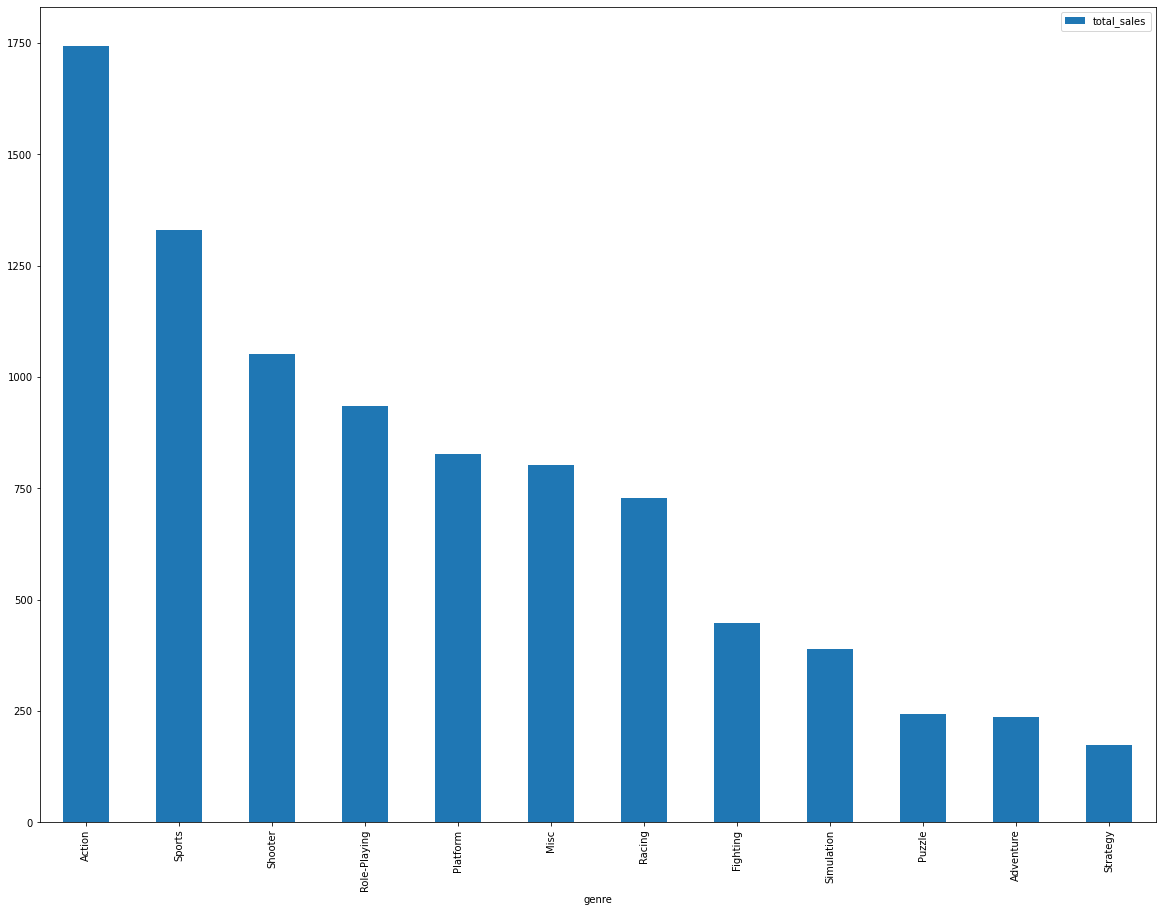

In [45]:

#Ventas totales por género
data_games.pivot_table(index=['genre'], values= 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(20,15))
plt.show()



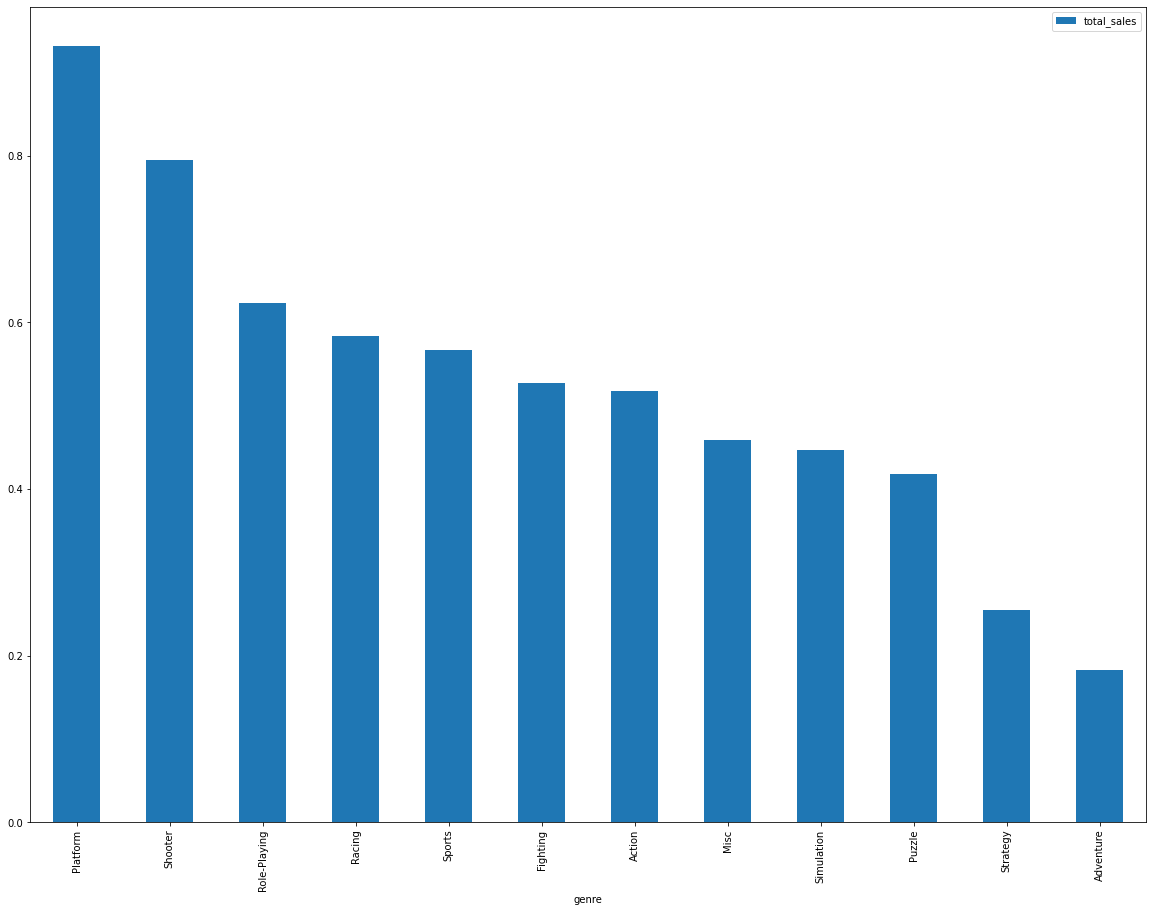

In [46]:
#Ventas promedio por género
data_games.pivot_table(index=['genre'], values= 'total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(20,15))
plt.show()


Podemos observar que en ambitos generales, odemos apreciar que las ventas globales totales en comparación de los géneros, podemos apreciar que los géneros con  mayores ingresos totales son los de Action y Sport, lo cual concuerda con la información obtenida en el histograma de la distribución de video juegos por género, ya que podemos observar que estos mismos generos son los que tienen mayor cantidad de video juégos y coincide que sean los más rentables porque tienen mayor cantidad de ventas.

Mientras que los géneros que tienen mayores ventas promedio son los de género platform, y shoother, pero no son los que más ingresos totales.

[Regresar a Contenido](#back)

## 4. Perfil de ususario para cada región <a id='perfiles'></a>



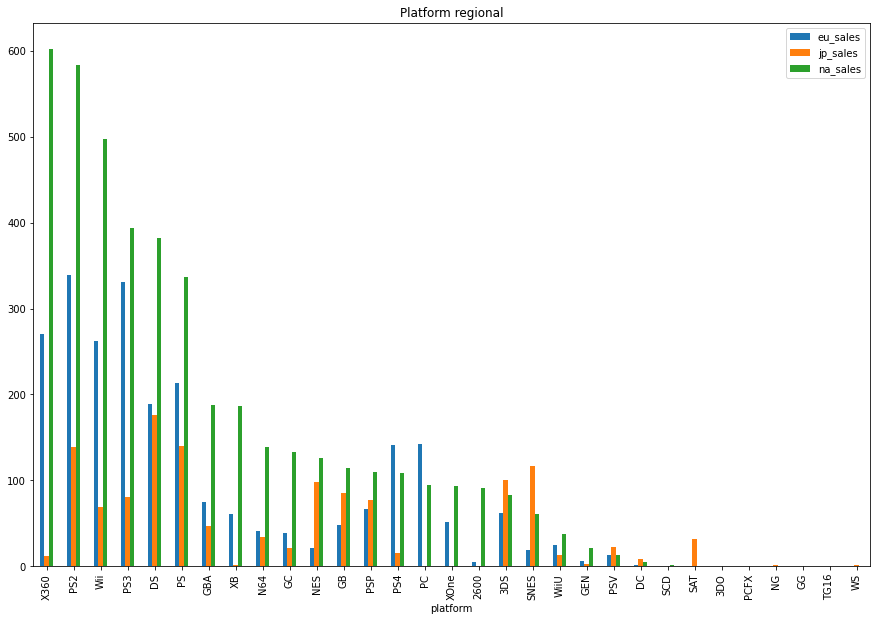

In [47]:
# Para cada región (NA, UE, JP) determina las cinco plataformas principales
games_region=data_games.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
games_region.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(15,10), title='Platform regional')
plt.show()



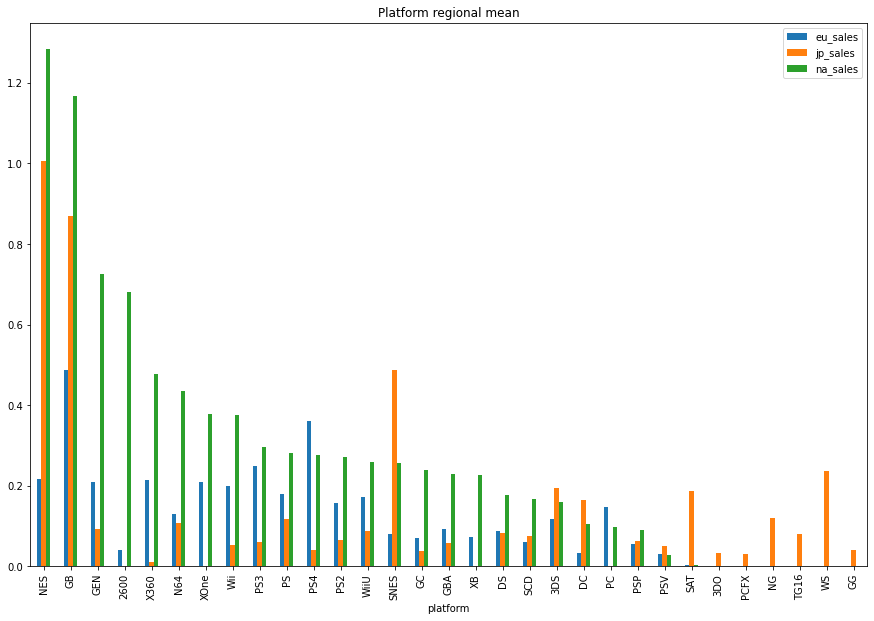

In [48]:
games_region_mean=data_games.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'], aggfunc='mean')
games_region_mean.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(15,10), title='Platform regional mean')
plt.show()



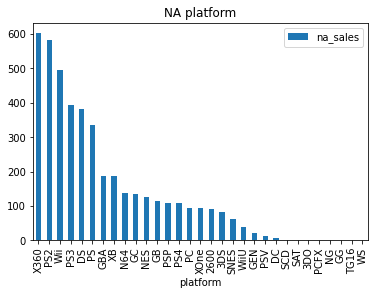

In [49]:

games_region.pivot_table(index='platform', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending=False).plot(kind='bar', title='NA platform')
plt.show()

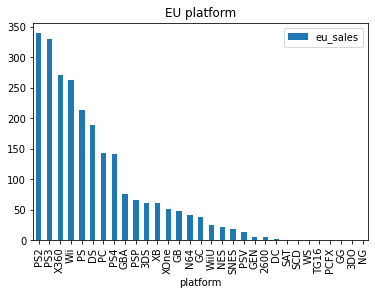

In [50]:

games_region.pivot_table(index='platform', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending=False).plot(kind='bar', title='EU platform')
plt.show()

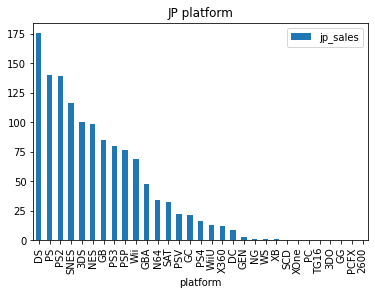

In [51]:

games_region.pivot_table(index='platform', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending=False).plot(kind='bar', title='JP platform')
plt.show()

Se realizó un gráfico general para poder apreciar el comportamiento de los datos, donde pudimos apreciar que las ventas globales de videojuegos varian la plataforma y la región donde se vendan estos, por lo que se realizó un análisis de ventas de las regiones por plataforma, donde podemos apreciar que las cinco principales pataformas  con mayores ventas en cada una de las regiones es:

- NA : X360, PS2, Wii, PS3 y DS
- UE : PS2, PS3, X360, Wii y PS
- JP : DS, PS, PS2, SNES y 3DS

Con respecto a las cuotas de mercado, podemos observar que en NA tenemos las mayores ventas. Apreciando que en UE podemos obsevar que las ventas tienen un menor volumen y representan aproximadamente un 58% de las de NA. Mientras que las ventas de JP, es la región de menos ventas de las tres, representando aproximadamente un 50% de las ventas de UE.  

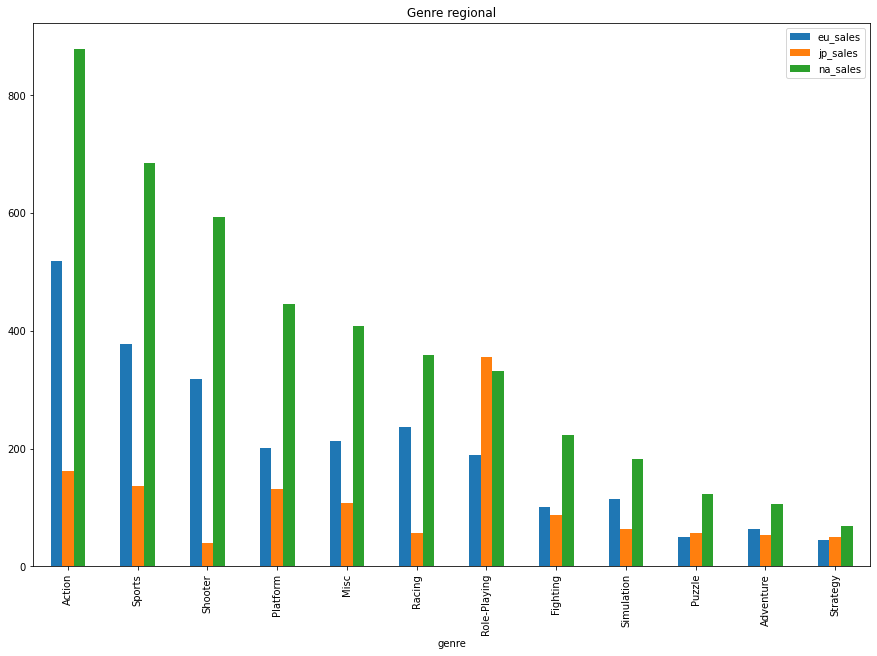

In [52]:
# Para cada región (NA, UE, JP) determina los cinco géneros principales

games_region_genre=data_games.pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
games_region_genre.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(15,10), title= 'Genre regional')
plt.show()

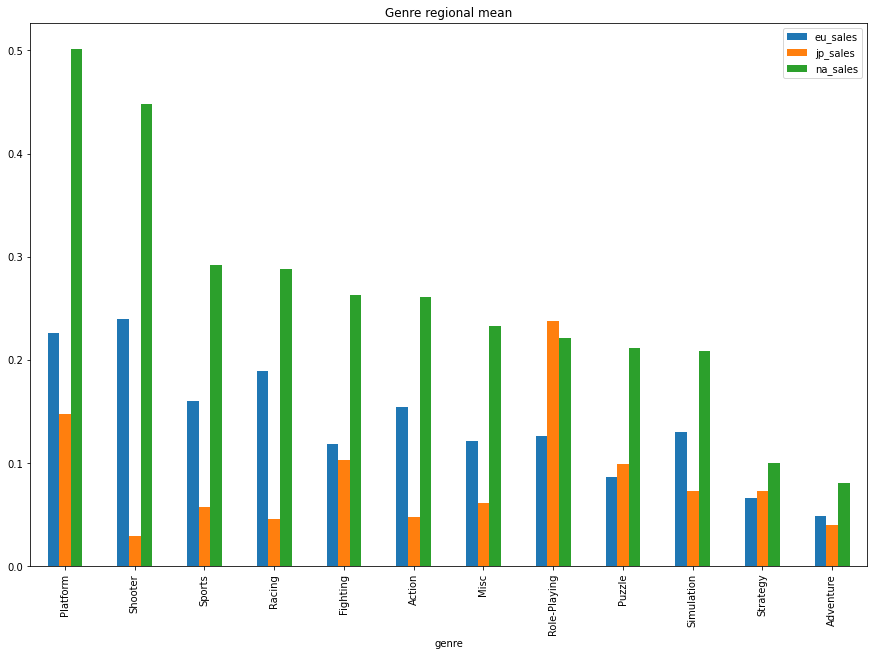

In [53]:
games_region_genre_mean=data_games.pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales'], aggfunc='mean')
games_region_genre_mean.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(15,10), title= 'Genre regional mean')
plt.show()

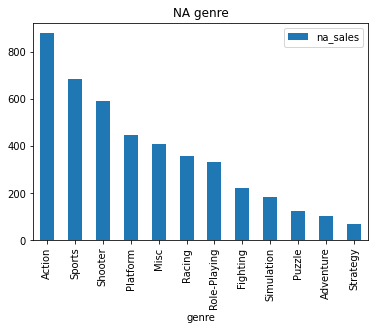

In [54]:

games_region_genre.pivot_table(index='genre', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending=False).plot(kind='bar', title='NA genre')
plt.show()

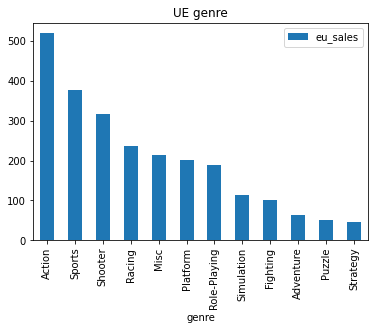

In [55]:

games_region_genre.pivot_table(index='genre', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending=False).plot(kind='bar', title='UE genre')
plt.show()

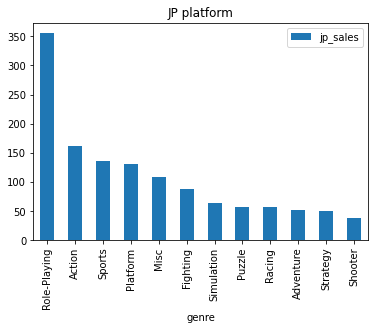

In [56]:

games_region_genre.pivot_table(index='genre', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending=False).plot(kind='bar', title='JP platform')
plt.show()

Se realizó un gráfico general para poder apreciar el comportamiento de los datos, donde pudimos apreciar que las ventas globales de videojuegos varian dependiendo el género y la región donde se vendan estos, en donde podemos observar que en NA y UE los datos tienen un comportamiento semejante, sin embargo en comparación con JP no sigue esa línea, por lo que se realizó un análisis de ventas de las regiones por género, donde podemos apreciar que los cinco principales géneros  con mayores ventas en cada una de las regiones es:

- NA : Action, Sports, Shooter, Platform y Misc
- UE : Action, Sports, Shooter, Racing y Misc
- JP : Role-Playing, Action, Sports, Platform y Misc



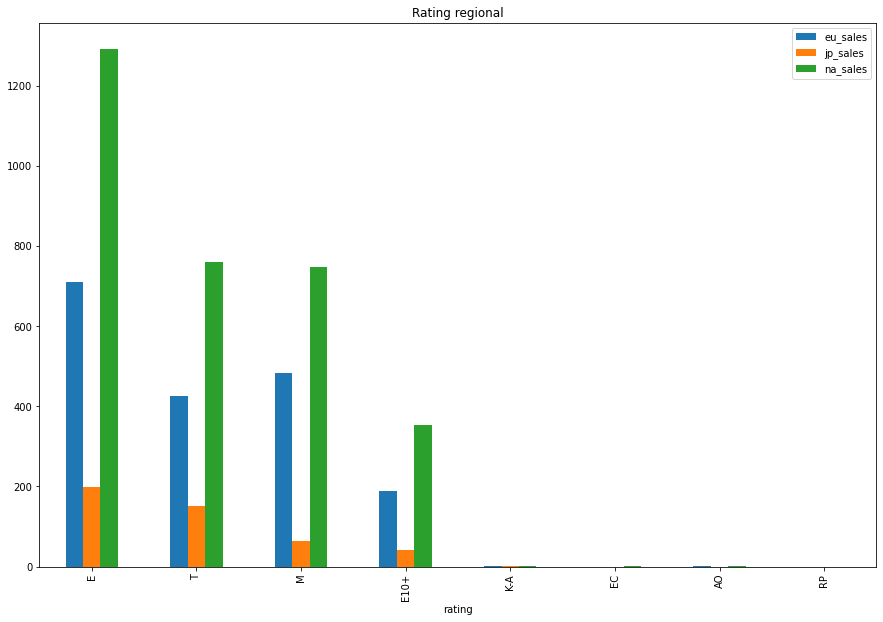

In [57]:
# Para cada región (NA, UE, JP) determina como las clasificaciones de ESRB afectan a las ventas en regiones individuales.

games_region_rating=data_games.pivot_table(index=['rating'], values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
games_region_rating.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(15,10), title= 'Rating regional')
plt.show()

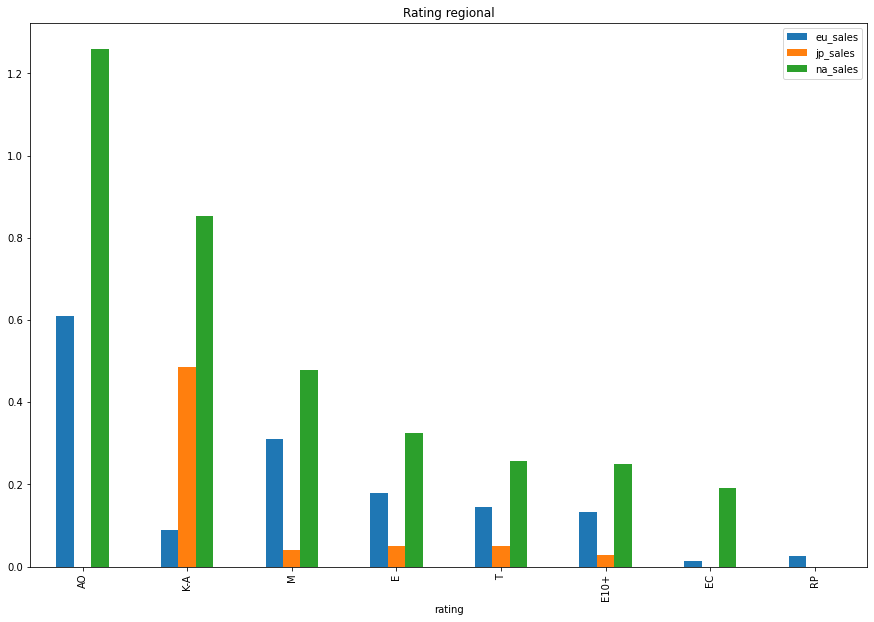

In [58]:
games_region_rating_mean=data_games.pivot_table(index=['rating'], values=['na_sales','eu_sales','jp_sales'], aggfunc='mean')
games_region_rating_mean.sort_values(by='na_sales', ascending=False).plot(kind='bar',figsize=(15,10), title= 'Rating regional')
plt.show()

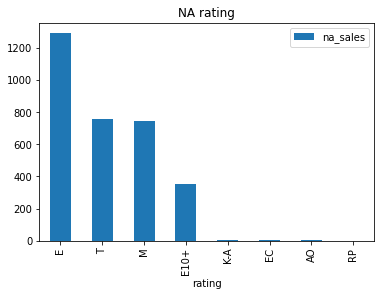

In [59]:

games_region_rating.pivot_table(index='rating', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending=False).plot(kind='bar', title='NA rating')
plt.show()

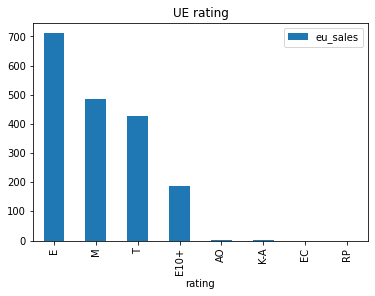

In [60]:

games_region_rating.pivot_table(index='rating', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending=False).plot(kind='bar', title='UE rating')
plt.show()

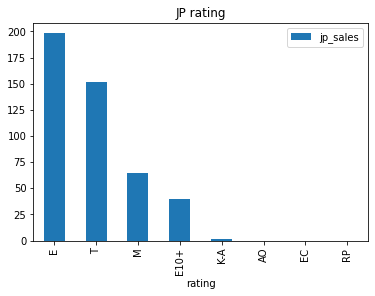

In [61]:

games_region_rating.pivot_table(index='rating', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending=False).plot(kind='bar', title='JP rating')
plt.show()

Se realizó un gráfico general donde podemos observar que en las tres regiones las cuatro principales clasificaciones son E,T,M y E10+, algunos en diferente orden pero en todos los casos son los cuatro principales clasificaciones.

[Regresar a Contenido](#back)

# 4. Prueba de Hipótesis <a id='hypotheses'></a>

### Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

En esta hipótesis utilizaremos un umbral del 5%, ya que es uno de los valores más comunes, en este caso no contamos con la varianza de los datos, por lo que las calcularemos para determinar si tenemos varainzas semejantes o diferentes en los dos dataframe.

In [62]:

xbox_list=data_games.query('platform=="XOne"')['user_score']
pc_list=data_games.query('platform=="PC"')['user_score']


En esta ocasión podmeos observar que el valor de p es mayor a p=0.05 lo cual sugiere que tienen varianzas iguales o semejantes.

In [63]:
np.var(xbox_list)

1.8965188383045526

In [64]:
np.var(pc_list)

2.3377471580367684

In [65]:
[np.var(x,ddof=1) for x in [xbox_list,pc_list]]

[1.9069968429360695, 2.3407871413372066]

Sacamos las varianzas de los dataframe que manejamos y podemos observar que efectivamente no varían por mucho pero no son iguales, por lo que utilizaremos equal_var=False. Para comprobar esta hipótesis se utilizara metodo scipy.stats.ttest_ind (array, popmean), para probar tu hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas. 

In [66]:
alpha1= 0.05 
result1 = st.ttest_ind(xbox_list, pc_list, equal_var=False)
print('p-value: ', result1.pvalue)
if result1.pvalue < alpha1:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.") 


p-value:  nan
No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


### Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

En esta hipótesis utilizaremos un umbral del 5%, ya que es uno de los valores más comunes, en este caso no contamos con la varianza de los datos, por lo que las calcularemos para determinar si tenemos varainzas semejantes o diferentes en los dos dataframe.

In [67]:

action_list=data_games.query('genre=="Action"')['user_score']
sports_list=data_games.query('genre=="Sports"')['user_score']
sports_list_mean=sports_list.mean()


In [68]:
np.var(action_list)

2.0306366538266296

In [69]:
np.var(sports_list)

2.5941606711770175

In [70]:
[np.var(x,ddof=1) for x in [action_list,sports_list]]

[2.031746898033205, 2.596514718973004]

Sacamos las varianzas de los dataframe que manejamos y no son iguales, por lo que utilizaremos equal_var=False. Para comprobar esta hipótesis se utilizara metodo scipy.stats.ttest_ind (array, popmean), para probar tu hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas. 

In [71]:
alpha1= 0.05 
result1 = st.ttest_ind(action_list, sports_list, equal_var=False)
print('p-value: ', result1.pvalue)
if result1.pvalue < alpha1:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.") 


p-value:  nan
No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


[Regresar a Contenido](#back)

# Conclusión general <a id='end'></a>

1.	La mayor densidad de lanzamiento de juegos se aprecia a partir del año 2000.
2.	Las plataformas líderes en ventas globales son la PS2, X360, PS3, Wii y DS, siendo estas las más populares.
3.	Las puntuaciones referidas por los usuarios no tienen una correlación con las ventas, ya que el coeficiente de correlación es cercano a uno, por lo que se puede decir que estos dos parámetros tienen una conexión débil, sin embargo, en la grafica de dispersión se puede observar cierta tendencia a que los usuarios compran los videojuegos que tienen una calificación mayor a 7.
4.	 Hay videojuegos que fueron lanzados para diferentes plataformas, logrando observar que las ventas si dependía de la plataforma para la que se compraba.
5.	Se puede observar que las ventas de los videojuegos si puede influirse por el genero de este, ya que se pudo observar una tendencia, en la que los videojuegos de Acción y Deportes fueron los que tuvieron mayores ventas de todos los géneros.
6.	De las tres regiones analizadas la región de Norte América la que tuvo un ingreso de ventas mayor, mientras que la región de Japón fue la que tuvo una cantidad menor de ingreso por ventas.
7.	En Norteamérica las plataformas más populares son X360, PS2, Wii, PS3 y DS. Los géneros más populares en esta región son Action, Sports, Shooter, Platform y Misc. 
8.	En Europa las plataformas más populares son PS2, PS3, X360, Wii y PS. Los géneros más populares en esta región son Action, Sports, Shooter, Racing y Misc.
9.	En Japón las plataformas más populares son DS, PS, PS2, SNES y 3DS. Los géneros más populares en esta región son ole-Playing, Action, Sports, Platform y Misc.
10.	En las tres regiones las clasificaciones de videojuegos más populares son E, T, M E10+.
11.	Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
12.	No rechazamos la hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
13.	Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.
14.	El éxito de un videojuego puede deberse a la plataforma para la que se lanza y el género

[Regresar a Contenido](#back)